In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.metrics import confusion_matrix

# 1. Import data

In [2]:
data = pd.read_csv("C:\\Users\\cyine\\Desktop\\DataSet_HAR.csv")
data2 = pd.read_csv("C:\\Users\\cyine\\Desktop\\DataSet_HAR.csv")
data.head(n=14)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING
5,0.277199,-0.010098,-0.105137,-0.997335,-0.990487,-0.995420,-0.997627,-0.990218,-0.995549,-0.942469,...,-0.844619,0.082632,-0.143439,0.275041,-0.368224,-0.849632,0.184823,-0.042126,1,STANDING
6,0.279454,-0.019641,-0.110022,-0.996921,-0.967186,-0.983118,-0.997003,-0.966097,-0.983116,-0.940987,...,-0.564430,-0.212754,-0.230622,0.014637,-0.189512,-0.852150,0.182170,-0.043010,1,STANDING
7,0.277432,-0.030488,-0.125360,-0.996559,-0.966728,-0.981585,-0.996485,-0.966313,-0.982982,-0.940987,...,-0.421715,-0.020888,0.593996,-0.561871,0.467383,-0.851017,0.183779,-0.041976,1,STANDING
8,0.277293,-0.021751,-0.120751,-0.997328,-0.961245,-0.983672,-0.997596,-0.957236,-0.984379,-0.940598,...,-0.572995,0.012954,0.080936,-0.234313,0.117797,-0.847971,0.188982,-0.037364,1,STANDING
9,0.280586,-0.009960,-0.106065,-0.994803,-0.972758,-0.986244,-0.995405,-0.973663,-0.985642,-0.940028,...,0.140452,-0.020590,-0.127730,-0.482871,-0.070670,-0.848294,0.190310,-0.034417,1,STANDING


In [3]:
#Looking at some basic statistics of each feature
data.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,...,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000
mean,0.274347,-0.017743,-0.108925,-0.607784,-0.510191,-0.613064,-0.633593,-0.525697,-0.614989,-0.466732,...,-0.298592,-0.617700,0.007705,0.002648,0.017683,-0.009219,-0.496522,0.063255,-0.054284,16.146422
std,0.067628,0.037128,0.053033,0.438694,0.500240,0.403657,0.413333,0.484201,0.399034,0.538707,...,0.320199,0.308796,0.336591,0.447364,0.616188,0.484770,0.511158,0.305468,0.268898,8.679067
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262625,-0.024902,-0.121019,-0.992360,-0.976990,-0.979137,-0.993293,-0.977017,-0.979064,-0.935788,...,-0.536174,-0.841847,-0.124694,-0.287031,-0.493108,-0.389041,-0.817288,0.002151,-0.131880,9.000000
50%,0.277174,-0.017162,-0.108596,-0.943030,-0.835032,-0.850773,-0.948244,-0.843670,-0.845068,-0.874825,...,-0.335160,-0.703402,0.008146,0.007668,0.017192,-0.007186,-0.715631,0.182028,-0.003882,17.000000
75%,0.288354,-0.010625,-0.097589,-0.250293,-0.057336,-0.278737,-0.302033,-0.087405,-0.288149,-0.014641,...,-0.113167,-0.487981,0.149005,0.291490,0.536137,0.365996,-0.521503,0.250790,0.102970,24.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30.000000


In [4]:
#Checking data types of each feature
data.dtypes

tBodyAcc-mean()-X                       float64
tBodyAcc-mean()-Y                       float64
tBodyAcc-mean()-Z                       float64
tBodyAcc-std()-X                        float64
tBodyAcc-std()-Y                        float64
tBodyAcc-std()-Z                        float64
tBodyAcc-mad()-X                        float64
tBodyAcc-mad()-Y                        float64
tBodyAcc-mad()-Z                        float64
tBodyAcc-max()-X                        float64
tBodyAcc-max()-Y                        float64
tBodyAcc-max()-Z                        float64
tBodyAcc-min()-X                        float64
tBodyAcc-min()-Y                        float64
tBodyAcc-min()-Z                        float64
tBodyAcc-sma()                          float64
tBodyAcc-energy()-X                     float64
tBodyAcc-energy()-Y                     float64
tBodyAcc-energy()-Z                     float64
tBodyAcc-iqr()-X                        float64
tBodyAcc-iqr()-Y                        

# 2. Data exploratory analysis

In [5]:
#Check for missing values
data.isnull().sum()

tBodyAcc-mean()-X                       0
tBodyAcc-mean()-Y                       0
tBodyAcc-mean()-Z                       0
tBodyAcc-std()-X                        0
tBodyAcc-std()-Y                        0
tBodyAcc-std()-Z                        0
tBodyAcc-mad()-X                        0
tBodyAcc-mad()-Y                        0
tBodyAcc-mad()-Z                        0
tBodyAcc-max()-X                        0
tBodyAcc-max()-Y                        0
tBodyAcc-max()-Z                        0
tBodyAcc-min()-X                        0
tBodyAcc-min()-Y                        0
tBodyAcc-min()-Z                        0
tBodyAcc-sma()                          0
tBodyAcc-energy()-X                     0
tBodyAcc-energy()-Y                     0
tBodyAcc-energy()-Z                     0
tBodyAcc-iqr()-X                        0
tBodyAcc-iqr()-Y                        0
tBodyAcc-iqr()-Z                        0
tBodyAcc-entropy()-X                    0
tBodyAcc-entropy()-Y              

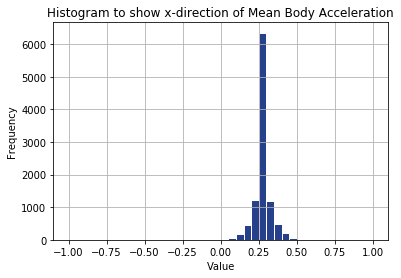

Text(0,0.5,'Density')

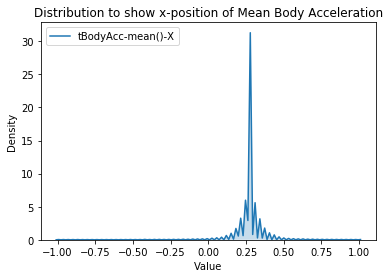

In [6]:
pd.DataFrame.hist(data, column = 'tBodyAcc-mean()-X', edgecolor='white', bins=40, color='#27408B')
plt.title('Histogram to show x-direction of Mean Body Acceleration')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

sns1 = sns.kdeplot(data['tBodyAcc-mean()-X'], shade = True)
sns1.set_title("Distribution to show x-position of Mean Body Acceleration")
sns1.set_xlabel('Value')
sns1.set_ylabel('Density')


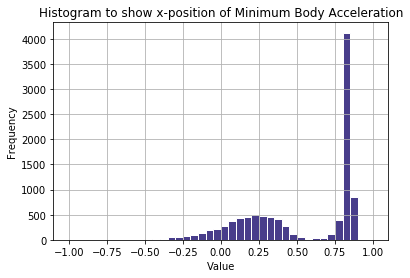

Text(0,0.5,'Density')

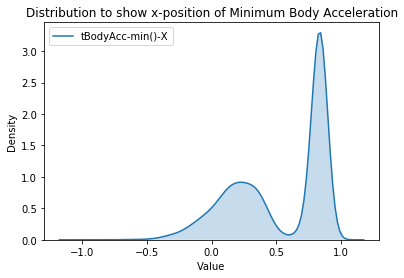

In [145]:
pd.DataFrame.hist(data, column = 'tBodyAcc-min()-X', edgecolor='white', bins=40, color='#483D8B')
plt.title('Histogram to show x-position of Minimum Body Acceleration')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

sns2 = sns.kdeplot(data['tBodyAcc-min()-X'], shade = True)
sns2.set_title("Distribution to show x-position of Minimum Body Acceleration")
sns2.set_xlabel('Value')
sns2.set_ylabel('Density')

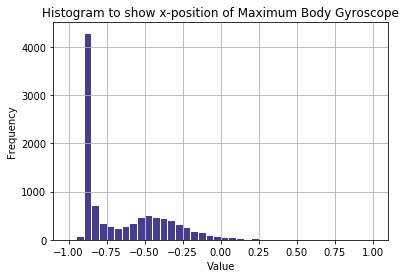

Text(0,0.5,'Density')

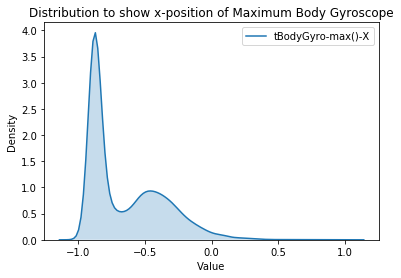

In [146]:
pd.DataFrame.hist(data, column = 'tBodyGyro-max()-X', edgecolor='white', bins=40, color='#483D8B')
plt.title('Histogram to show x-position of Maximum Body Gyroscope')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

sns3 = sns.kdeplot(data['tBodyGyro-max()-X'], shade = True)
sns3.set_title("Distribution to show x-position of Maximum Body Gyroscope")
sns3.set_xlabel('Value')
sns3.set_ylabel('Density')

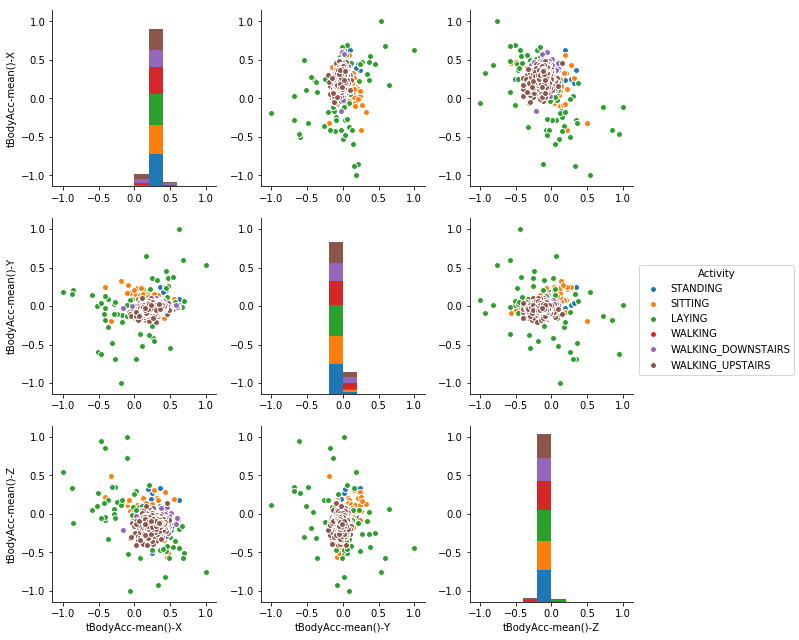

In [67]:
tBodyAccMean = data[['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'Activity']]
tBodyAccMean.head()
sns4 = sns.pairplot(tBodyAccMean, hue = 'Activity', size = 3)
#sns4.set_title("Multidimensional relationship between X, Y, Z directions of Mean Body Acceleration for each activity")

Text(0.5,1,'Boxplot showing Z directon of Mean Body Acceleration for each activity')

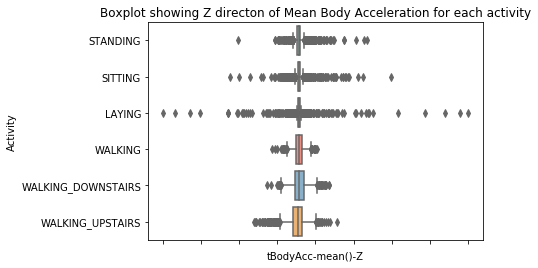

In [68]:
sns5 = sns.boxplot('tBodyAcc-mean()-Z', 'Activity', data=data, palette = 'Set3', width=0.8)
sns5.set_xticklabels(sns5.get_xticklabels(), rotation=90)
sns5.set_title("Boxplot showing Z directon of Mean Body Acceleration for each activity")

Text(0.5,1,'Boxplot showing Z directon of Mean Graivty Acceleration for each activity')

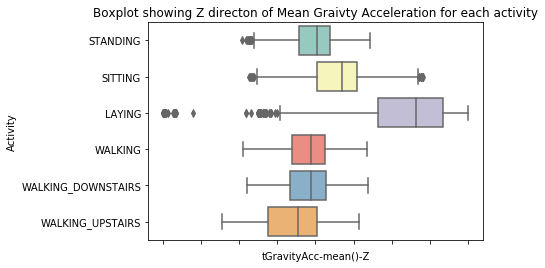

In [69]:
sns6 = sns.boxplot('tGravityAcc-mean()-Z', 'Activity', data=data, palette = 'Set3', width=0.8)
sns6.set_xticklabels(sns5.get_xticklabels(), rotation=90)
sns6.set_title("Boxplot showing Z directon of Mean Graivty Acceleration for each activity")


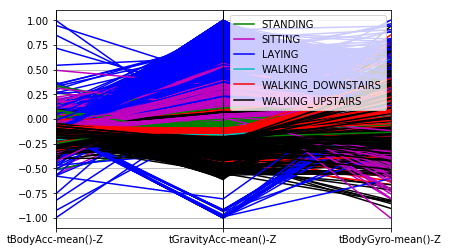

In [109]:
##Takes about 2-3min to run####
#parallel co-ordinates
#from pandas.plotting import parallel_coordinates
#plt.figure()
#parallel_coordinates(data[['Activity', 'tBodyAcc-mean()-Z', 'tGravityAcc-mean()-Z', 'tBodyGyro-mean()-Z']], 'Activity', color=['g', 'm', 'b', 'c', 'r', 'k'])
#plt.show()

In [ ]:
#Checking for proportion of each activity label
data.groupby('Activity').size()

Text(0,0.5,'Frequency')

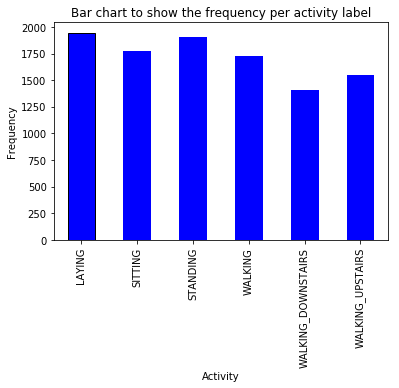

In [122]:
#Making a bar chart showing frequency of each label
activity_group = data.groupby('Activity').size()
activity_plot = activity_group.plot(kind='bar',title="Bar chart to show the frequency per activity label", color = 'blue', edgecolor = 'black')
activity_plot.set_xlabel("Activity")
activity_plot.set_ylabel("Frequency")

# 3. Split into training and testing sets

In [11]:
#choosing a random 21/30 sample for training set
import random
chosen_21 = random.sample(range(1,30), 21)
print(*chosen_21)
chosen_mine = [1, 2, 3, 4, 5 ,6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
chosen_mine

29 16 19 20 28 2 27 6 26 17 8 10 9 12 1 5 7 4 14 15 24


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]

In [23]:
#Splitting into train and test sets
data_train = data.loc[data['subject'].isin(chosen_mine)]
data_test = data.loc[~data['subject'].isin(chosen_mine)]

#Splitting Activity target labels

X_train = data_train.loc[:, data_train.columns != 'Activity']

Y_train = data_train.loc[:, data_train.columns == 'Activity']

X_test = data_test.loc[:, data_test.columns != 'Activity']

Y_test = data_test.loc[:, data_test.columns == 'Activity']
X_test

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
4373,0.272729,-0.032112,-0.089805,-0.907377,-0.768412,-0.813236,-0.937856,-0.786847,-0.808578,-0.750826,...,-0.232377,-0.622256,-0.047121,-0.018493,0.700059,0.546869,-0.814344,0.210409,-0.046732,22
4374,0.283785,-0.013841,-0.118087,-0.982458,-0.886811,-0.882858,-0.985024,-0.902208,-0.869677,-0.911698,...,-0.129439,-0.573341,-0.106887,0.196761,0.239988,0.027014,-0.808165,0.215654,-0.045886,22
4375,0.281043,-0.026712,-0.156867,-0.993657,-0.971839,-0.966798,-0.995049,-0.974020,-0.964710,-0.929613,...,-0.433264,-0.785310,-0.002204,0.296978,0.470075,-0.716862,-0.812873,0.213879,-0.042109,22
4376,0.277687,-0.021567,-0.119773,-0.997574,-0.971204,-0.962630,-0.997970,-0.973411,-0.961315,-0.940367,...,0.004761,-0.466258,-0.017931,0.011397,-0.049740,-0.832645,-0.815056,0.217049,-0.030873,22
4377,0.278339,-0.005325,-0.091862,-0.995709,-0.938244,-0.979962,-0.995990,-0.943095,-0.981371,-0.940367,...,0.111759,-0.356355,0.051021,0.084262,-0.019226,0.932176,-0.815488,0.217848,-0.027827,22
4378,0.277214,-0.006984,-0.096736,-0.995186,-0.931338,-0.975548,-0.995111,-0.934889,-0.978031,-0.940648,...,-0.061449,-0.516818,0.074704,0.154236,-0.639793,0.597115,-0.819423,0.213394,-0.031941,22
4379,0.278903,-0.018656,-0.110488,-0.996270,-0.954903,-0.979316,-0.996473,-0.952464,-0.977481,-0.940456,...,0.174811,-0.068590,-0.197233,0.070560,-0.777286,-0.848963,-0.822672,0.209819,-0.034680,22
4380,0.278518,-0.016892,-0.099820,-0.996727,-0.964696,-0.972902,-0.996997,-0.966495,-0.970349,-0.940456,...,0.381357,0.098753,-0.078858,0.185182,-0.788181,-0.628807,-0.822467,0.209948,-0.034740,22
4381,0.271838,-0.026348,-0.104457,-0.995325,-0.934248,-0.964699,-0.996054,-0.937385,-0.959578,-0.944265,...,0.077161,-0.360573,0.041864,-0.140527,0.289355,0.165562,-0.820370,0.210423,-0.037247,22
4382,0.275440,-0.024473,-0.120886,-0.994521,-0.927935,-0.977146,-0.995232,-0.929147,-0.980751,-0.942344,...,-0.004781,-0.480194,0.018259,-0.114734,0.854470,0.552296,-0.815165,0.214115,-0.037809,22


# 4. Objective one

In [24]:
#Predictive Model 1: Fitting a Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

modelnb = nb.fit(X_train, Y_train)
Y_nb_predict = modelnb.predict(X_test)

print("Model accuracy: ", modelnb.score(X_test, Y_test))
print(classification_report(Y_test, Y_nb_predict))
confusion_matrix(Y_test, Y_nb_predict)

C:\Users\cyine\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model accuracy:  0.763095238095
                    precision    recall  f1-score   support

            LAYING       0.99      0.97      0.98       658
           SITTING       0.63      0.90      0.74       605
          STANDING       0.85      0.48      0.61       631
           WALKING       0.84      0.63      0.72       525
WALKING_DOWNSTAIRS       0.75      0.65      0.69       453
  WALKING_UPSTAIRS       0.64      0.92      0.76       488

       avg / total       0.79      0.76      0.76      3360



array([[641,   4,   0,   0,   0,  13],
       [  5, 547,  52,   0,   0,   1],
       [  1, 322, 301,   1,   0,   6],
       [  0,   0,   0, 333,  66, 126],
       [  0,   0,   0,  57, 293, 103],
       [  0,   0,   0,   7,  32, 449]], dtype=int64)

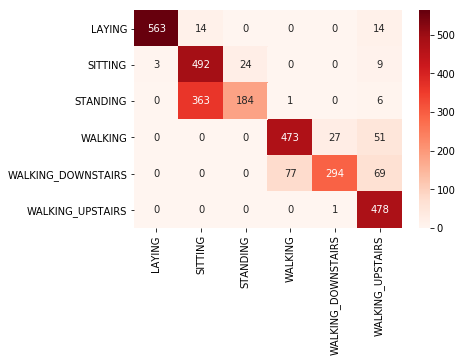

In [198]:
sns.heatmap(data=confusion_matrix(Y_test, Y_nb_predict), xticklabels=np.unique(Y_test), yticklabels=np.unique(Y_test), 
            annot=True, fmt='d', cmap="Reds")

In [199]:
#Predictive Model 2: Fitting a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

#Training set 
modelrf = rf.fit(X_train, Y_train)

#Testing set
Y_predict = modelrf.predict(X_test)
print("Model accuracy: ", modelrf.score(X_test, Y_test))
print(classification_report(Y_test, Y_predict))
confusion_matrix(Y_test, Y_predict)

C:\Users\cyine\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Model accuracy:  0.949093223035
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       591
           SITTING       0.88      0.98      0.93       528
          STANDING       0.98      0.88      0.92       554
           WALKING       0.92      0.98      0.95       551
WALKING_DOWNSTAIRS       0.96      0.89      0.93       440
  WALKING_UPSTAIRS       0.96      0.95      0.96       479

       avg / total       0.95      0.95      0.95      3143



array([[589,   0,   0,   0,   0,   2],
       [  0, 517,  11,   0,   0,   0],
       [  0,  68, 486,   0,   0,   0],
       [  0,   0,   0, 542,   4,   5],
       [  0,   0,   0,  37, 393,  10],
       [  0,   0,   0,  12,  11, 456]], dtype=int64)

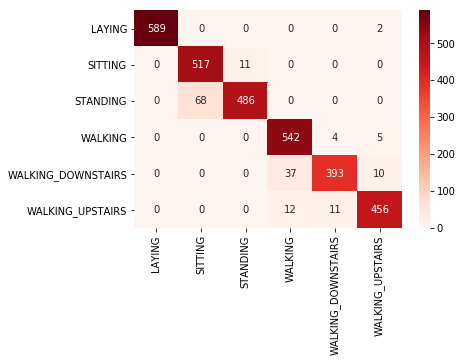

In [200]:
sns.heatmap(data=confusion_matrix(Y_test, Y_predict), xticklabels=np.unique(Y_test), yticklabels=np.unique(Y_test), 
            annot=True, fmt='d', cmap="Reds")

# 5. Objective two

In [458]:
#choosing a random 21/30 sample for training set
import random
chosen2_21 = random.sample(range(1,30), 21)
#print(*chosen_21)

#Choosing 21 subjects as the train set
data2_train = data2.loc[data2['subject'].isin(chosen2_21)]
data2_test = data2.loc[~data2['subject'].isin(chosen2_21)]

X2_train = data2_train.loc[:, data2_train.columns != 'Activity']

Y2_train = data2_train.loc[:, data2_train.columns == 'Activity']

X2_test = data2_test.loc[:, data2_test.columns != 'Activity']

Y2_test = data2_test.loc[:, data2_test.columns == 'Activity']
X2_train.shape

#Method: Univariate feature selection

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

#avry number of features by changing k
selector = SelectKBest(f_classif, k=240)
bestfeatures = selector.fit(X2_train, Y2_train)
feature_indices = bestfeatures.get_support(indices=True)
feature_names = [X2_train.columns[i] for i in feature_indices]

X2_train_new = X2_train[feature_names]
X2_test_new = X2_test[feature_names]

from sklearn.ensemble import RandomForestClassifier
rf3 = RandomForestClassifier()

rfmodel = rf3.fit(X2_train_new, Y2_train)
Y_predicted = rfmodel.predict(X2_test_new)
print("Random Forest accuracy: ", rfmodel.score(X2_test_new, Y2_test))


C:\Users\cyine\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\cyine\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Random Forest accuracy:  0.905175184828


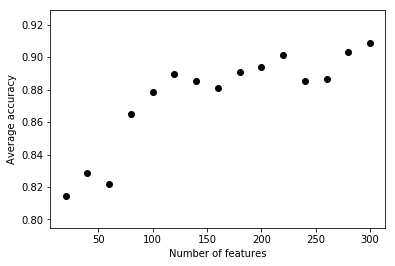

In [467]:
num_features = [20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300]
accuracy = [0.81475, 0.82869, 0.82178, 0.86478, 0.87821, 0.88969, 0.88556, 0.88109, 0.891, 0.89412, 0.90135, 0.88524, 0.88649, 0.90335, 0.90891
]
plt.scatter(num_features, accuracy, color='k')
plt.xlabel('Number of features')
plt.ylabel('Average accuracy')
plt.show()